# CODSOFT Data Science Internship Task 5 - Credit Card Fraud Detection
#### By Bhavya Sri Pragada

### Reading the data

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking for null values

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Hence no null values

## Data Analysis

In [5]:
import matplotlib.pyplot as plt

fraud_class=len(data[data.Class==1])
non_fraud_class=len(data[data.Class==0])
print("Count of fraud cases: ",fraud_class)
print("Count of non fraud cases: ",non_fraud_class)

Count of fraud cases:  492
Count of non fraud cases:  284315


Text(0.5, 1.0, 'Pie Chart of fraud vs non-fraud')

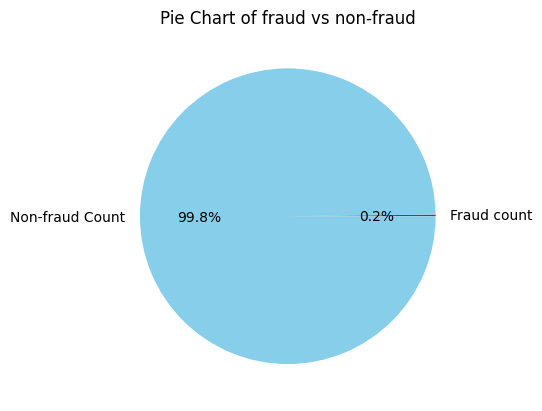

In [6]:
labels = ['Fraud count', 'Non-fraud Count']
count = [fraud_class, non_fraud_class]  
plt.pie(count, labels=labels,autopct='%1.1f%%', colors=['red','skyblue'])
plt.title('Pie Chart of fraud vs non-fraud')



## The data is unbalanced, hence it is necessary to sample the data to balance each cateogary

## Data pre-processing

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


### Lets make the fraud count equal to non-fraud count by balancing the data

In [8]:
minority_upsampled = resample(data[data.Class==1],
                              replace=True,  
                              n_samples=len(data[data.Class==0]),  
                              random_state=42) 

balanced_df = pd.concat([data[data.Class==0], minority_upsampled])


balanced_df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

## Creating the test and train data

In [9]:
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


## Model building

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

### Evaluating the models

In [14]:
acc_score={}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc=accuracy_score(y_test, y_pred)
    acc_score[model_name]=acc
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85295
           1       0.98      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Accuracy: 0.949404709565095
Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Accuracy: 0.999970689786563
Model: Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.99      1.00      0.99     85294

    accuracy                           0.99    170589

In [16]:
import seaborn as sns

<Axes: title={'center': 'Accuracy Scores of each Model'}, xlabel='Model', ylabel='Accuracy Score'>

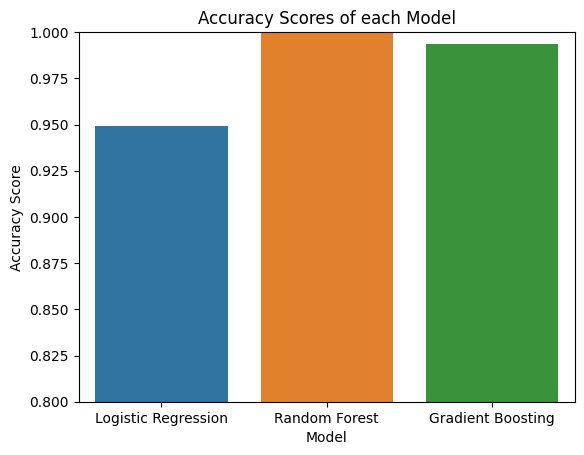

In [19]:
acc_data = pd.DataFrame(list(acc_score.items()),columns=['Model','Accuracy Score'])
plt.title("Accuracy Scores of each Model")
plt.ylim((0.8,1.0))
sns.barplot(x='Model',y='Accuracy Score',data=acc_data)

## Random forest model has achieved 100% accuracy for detecting credit card fraud transactions